# Churn in Telecom

#### Dataset taken from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [345]:
from __future__ import print_function
import numpy as np
import pandas as pd
from plotUtils import *
%reload_ext autoreload
%autoreload 2

## Read the file

In [346]:
df = pd.read_csv("./bigml_churn.csv", low_memory=False)

## Preview the file

In [347]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [348]:
df.shape

(3333, 21)

In [349]:
df.columns

Index([u'state', u'account length', u'area code', u'phone number',
       u'international plan', u'voice mail plan', u'number vmail messages',
       u'total day minutes', u'total day calls', u'total day charge',
       u'total eve minutes', u'total eve calls', u'total eve charge',
       u'total night minutes', u'total night calls', u'total night charge',
       u'total intl minutes', u'total intl calls', u'total intl charge',
       u'customer service calls', u'churn'],
      dtype='object')

In [350]:
df['total charge'] = df['total day charge'] + df['total night charge'] + df['total intl charge']

## Calculating churn by state

In [351]:
churn = df['churn'].value_counts()
churn

False    2850
True      483
Name: churn, dtype: int64

In [352]:
barPlot(churn, xcat=True)

In [353]:
def calcChurn(x):
    return x[x==True].count()*100.0/x.count()

In [354]:
pctgChurnByState = df.groupby('state')['churn'].apply(
    lambda x: calcChurn(x)).sort_values(ascending=False)

In [355]:
pctgChurnByState

state
CA    26.470588
NJ    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
MI    21.917808
MS    21.538462
NV    21.212121
WA    21.212121
ME    20.967742
MT    20.588235
AR    20.000000
KS    18.571429
NY    18.072289
MN    17.857143
PA    17.777778
MA    16.923077
CT    16.216216
NC    16.176471
NH    16.071429
GA    14.814815
DE    14.754098
OK    14.754098
OR    14.102564
UT    13.888889
CO    13.636364
KY    13.559322
SD    13.333333
OH    12.820513
FL    12.698413
IN    12.676056
ID    12.328767
WY    11.688312
MO    11.111111
VT    10.958904
AL    10.000000
ND     9.677419
NM     9.677419
WV     9.433962
TN     9.433962
DC     9.259259
RI     9.230769
WI     8.974359
IL     8.620690
NE     8.196721
LA     7.843137
IA     6.818182
VA     6.493506
AZ     6.250000
AK     5.769231
HI     5.660377
Name: churn, dtype: float64

## Let's plot churn % by State - Top 'n' states

In [356]:
barPlot(pctgChurnByState, title='Churn by State', xaxis="State", yaxis="% Churn", xcat=True)

## Churn by Area Code

In [357]:
df['area code'].unique()

array([415, 408, 510])

In [358]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [359]:
pctgChurnByAreaCode = df.groupby('area code')['churn'].apply(
    lambda x: calcChurn(x)).sort_values(ascending=False)[:10]

In [360]:
pctgChurnByAreaCode

area code
510    14.880952
408    14.558473
415    14.259819
Name: churn, dtype: float64

In [361]:
barPlot(pctgChurnByAreaCode, title='Churn by Area Code', 
          xaxis="Area Code", yaxis="%Churn", xcat=True)

## Churn by International Plan

In [362]:
pctgByIntlPlan = df.groupby(['international plan'])['churn'].apply(lambda x: calcChurn(x))

In [363]:
barPlot(pctgByIntlPlan, title='International Plan vs Churn', 
        xaxis="International Plan", yaxis="% Churn", xcat=True)

## Voicemail plans

In [364]:
pctgByVMPlan = df.groupby(['voice mail plan'])['churn'].apply(lambda x: calcChurn(x))

In [365]:
barPlot(pctgByVMPlan, title='VoiceMail Plan vs Churn', 
        xaxis="VoiceMail Plan", yaxis="% Churn", xcat=True)

## Customer Service Calls

In [366]:
groupedBoxPlot(df, col='customer service calls', byCol='churn', xaxis='Churn',
               title = 'Customer service calls', yaxis='No of calls')

## Total Day Minutes

In [367]:
groupedBoxPlot(df, col='total day minutes', byCol='churn', xaxis='Churn',
               title = 'Churn by total day minutes')

## Total Day Charge

In [368]:
groupedBoxPlot(df, col='total day charge', byCol='churn', xaxis='Churn',
               title = 'Churn by total Day Charge')

## Total Night Charge

In [369]:
groupedBoxPlot(df, col='total night charge', byCol='churn', xaxis='Churn',
               title = 'Churn by total Night Charge')

## Total Charges 

In [370]:
groupedBoxPlot(df, col='total charge', byCol='churn', xaxis='Churn',
               title = 'Churn by Total Charge (Day+Night+Intl)')

## Are we charging customers equally

In [371]:
(df['total day charge']/df['total day minutes']).describe()

count    3331.000000
mean        0.170003
std         0.000028
min         0.169231
25%         0.169989
50%         0.170004
75%         0.170017
max         0.170513
dtype: float64

In [372]:
histPlot(df['total day charge']/df['total day minutes'], xaxis='Day Rate',
               yaxis='Number of Customers', title = 'Day Rate Distribution')

In [373]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
total charge              float64
dtype: object

In [374]:
df.state[:10]

0    KS
1    OH
2    NJ
3    OH
4    OK
5    AL
6    MA
7    MO
8    LA
9    WV
Name: state, dtype: object

In [375]:
df.shape

(3333, 22)

## Convert state column from categorical to numeric

In [376]:
df = pd.concat([df, pd.get_dummies(df['state'])], axis=1)
df.drop('state', axis=1, inplace=True)

In [377]:
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


## Drop unnecessary columns and convert boolean to numeric

In [378]:
df.drop('phone number', axis=1, inplace=True)
df['international plan'] = df['international plan'].apply(lambda x: 1 if x=='yes' else 0)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 1 if x=='yes' else 0)
df['churn'] = df['churn'].apply(lambda x: 1 if x==True else 0)

In [379]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


## Time to build the model - define our X and y variables

In [380]:
df.shape

(3333, 71)

In [381]:
from sklearn.cross_validation import train_test_split
y = df['churn']
X = df.drop(['churn'], axis=1)

In [382]:
X.shape

(3333, 70)

In [383]:
y.shape

(3333,)

## Create train-test validation split

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Now create a classifier model and train it with training data

In [385]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Now let's predict using the unseen X_test data

In [386]:
y_pred = model.predict(X_test)

## How good were the predictions (y_pred) compared to actual values (y_test)

In [387]:
zip(y_pred, y_test)[:10]

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0)]

## Let's print the confusion matrix

In [388]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print ("ROC: %0.2f" % metrics.roc_auc_score(y_true=y_test, y_score=y_pred))

cm = confusion_matrix(y_test, y_pred)

plotConfusionMatrix(cm, class_names=['No', 'Yes'])

ROC: 0.81


## Let's print the decision tree and see if it makes sense

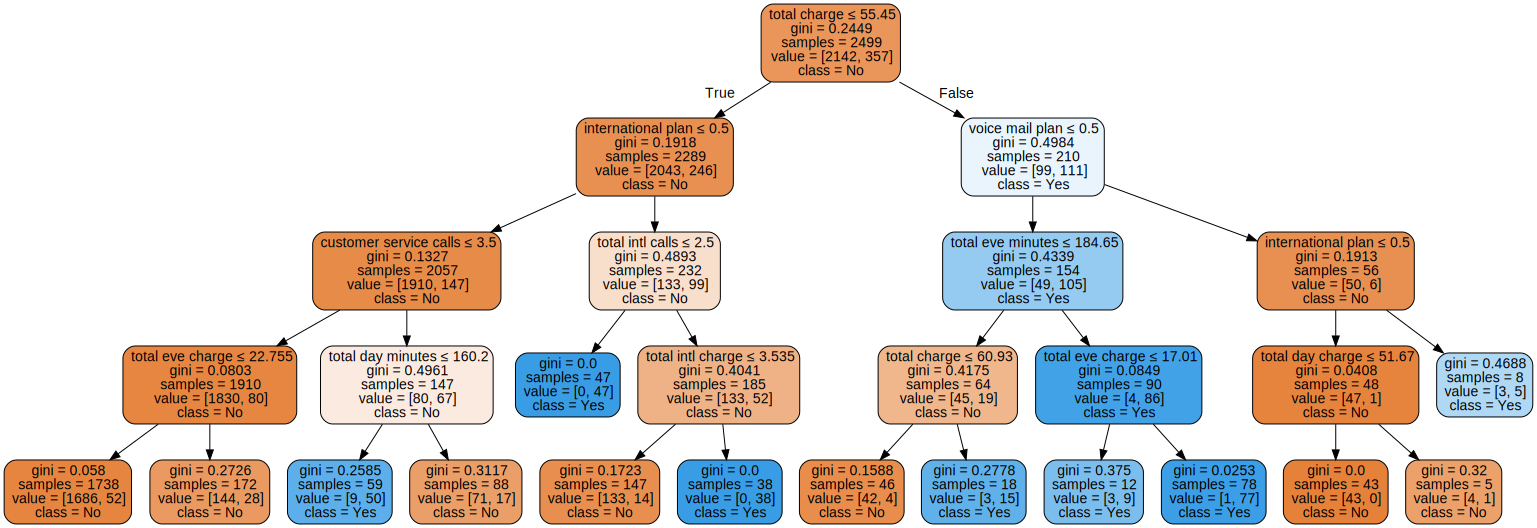

In [389]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['No', 'Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## <font color='blue'>Let's test it with a more complex model - Random Forest</font>

In [390]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Let's predict using the unseen (test) data

In [391]:
y_pred = model.predict(X_test)

## Let's test the quality of our predictions

In [392]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print ("ROC: %0.2f" % metrics.roc_auc_score(y_true=y_test, y_score=y_pred))

cm = confusion_matrix(y_test, y_pred)

plotConfusionMatrix(cm, class_names=['No', 'Yes'])

ROC: 0.83


In [393]:
fimp = model.feature_importances_
fimpIndex = fimp.argsort()[::-1]
zip(X.columns[fimpIndex], fimp[fimpIndex])[:10]

[('total charge', 0.10908722137367455),
 ('customer service calls', 0.08951115661207988),
 ('total day minutes', 0.08714741298220789),
 ('total day charge', 0.0852682862759979),
 ('international plan', 0.07589696811124907),
 ('total eve minutes', 0.05968308086241527),
 ('total eve charge', 0.052553291807874485),
 ('total intl minutes', 0.041252495864640235),
 ('total intl charge', 0.040852152291937775),
 ('total intl calls', 0.037148094685547035)]

In [394]:
barPlotXY(X.columns[fimpIndex][:5], fimp[fimpIndex][:5])